EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r"C:\Users\ishav\Downloads\Phonepe-Final-Dataset.xlsx",sheet_name=None)

([<matplotlib.axis.XTick at 0x1d976e21590>,
 [Text(2023, 0, '2023'), Text(2024, 0, '2024'), Text(2025, 0, '2025')])

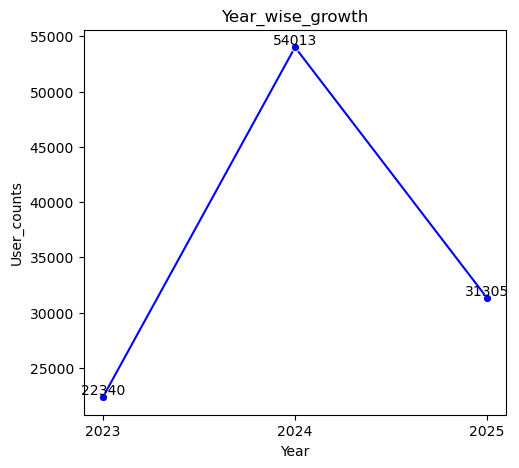

In [7]:
data=df["All_Users"]
# data.head(10)
# EDA
# data.rename(columns={"Name":"Full_name"},inplace=True)
# data["Year"]=data["Join_Date"].dt.year
# data["Quater"]=data["Join_Date"].dt.quarter
# data["Month"]=data["Join_Date"].dt.month
# data[data.duplicated()]
# data.drop_duplicates(inplace=True)
# data.isnull().sum()
# data.info()
# data.describe()
# plt.boxplot(data["Age"]) // there is no outliers
# # plt.hist(data["Age"],bins=20)

# Year_wise_growth
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
year_wise_users=data.groupby("Year")["User_ID"].count().reset_index()
sns.lineplot(data=year_wise_users,x="Year",y="User_ID",marker="o",color="blue")
plt.title("Year_wise_growth")
plt.xlabel("Year")
plt.ylabel("User_counts")
for i,values in zip(year_wise_users["Year"],year_wise_users["User_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom")
plt.xticks(year_wise_users["Year"])



# quarter-wise_growth
# plt.subplot(1,2,2)
# year_wise_users=data.groupby("Quater")["User_ID"].count().reset_index()
# sns.lineplot(data=year_wise_users,x="Quater",y="User_ID",marker="o",color="blue")
# plt.title("Quater_wise_groeth")
# plt.xlabel("Quater")
# plt.ylabel("User_counts")
# for i,values in zip(year_wise_users["Quater"],year_wise_users["User_ID"]):
#     plt.text(i,values,str(values),ha="center",va="bottom")
# plt.xticks(year_wise_users["Quater"])
# plt.tight_layout()

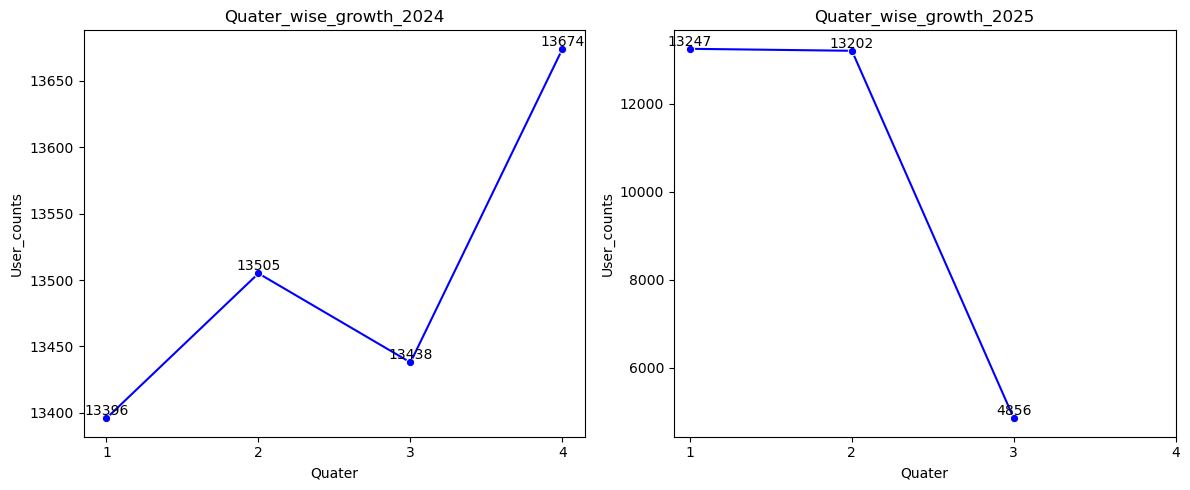

In [163]:
def Compare_month_quater_users_growth(data):
    def Quater_growths_2024():
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        year_wise2024_quater_growth=data.loc[data["Year"]==2024].groupby("Quater")["User_ID"].count().reset_index()
        sns.lineplot(data=year_wise2024_quater_growth,x="Quater",y="User_ID",marker="o",color="blue")
        plt.title("Quater_wise_growth_2024")
        plt.xlabel("Quater")
        plt.ylabel("User_counts")
        for i,values in zip(year_wise2024_quater_growth["Quater"],year_wise2024_quater_growth["User_ID"]):
            plt.text(i,values,str(values),ha="center",va="bottom")
        plt.xticks(year_wise2024_quater_growth["Quater"])
        plt.tight_layout()
        
        def Quater_growths_2025():
            plt.subplot(1,2,2)
            year_wise2025_quater_growth=data.loc[data["Year"]==2025].groupby("Quater")["User_ID"].count().reset_index()
            sns.lineplot(data=year_wise2025_quater_growth,x="Quater",y="User_ID",marker="o",color="blue")
            plt.title("Quater_wise_growth_2025")
            plt.xlabel("Quater")
            plt.ylabel("User_counts")
            for i,values in zip(year_wise2025_quater_growth["Quater"],year_wise2025_quater_growth["User_ID"]):
                plt.text(i,values,str(values),ha="center",va="bottom")
            plt.xticks(year_wise2024_quater_growth["Quater"])
            plt.tight_layout()
            plt.show()
        Quater_growths_2025()
    Quater_growths_2024()
        
Compare_month_quater_users_growth(data)
            

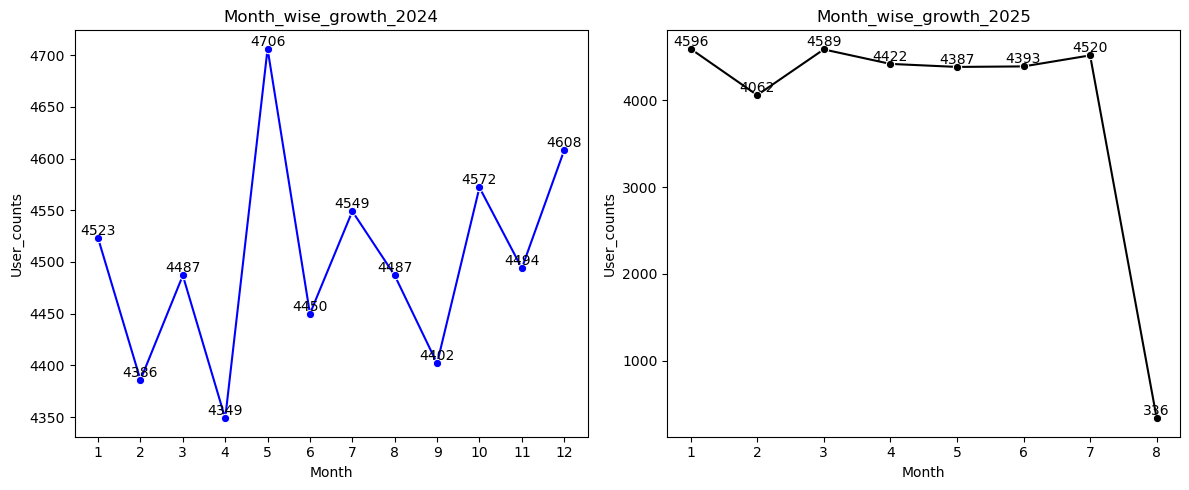

In [168]:
def Compare_month_quater_users_growth(data):
    def Month_growths_2024():
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        year_wise2024_Month_growth=data.loc[data["Year"]==2024].groupby("Month")["User_ID"].count().reset_index()
        sns.lineplot(data=year_wise2024_Month_growth,x="Month",y="User_ID",marker="o",color="blue")
        plt.title("Month_wise_growth_2024")
        plt.xlabel("Month")
        plt.ylabel("User_counts")
        for i,values in zip(year_wise2024_Month_growth["Month"],year_wise2024_Month_growth["User_ID"]):
            plt.text(i,values,str(values),ha="center",va="bottom")
        plt.xticks(year_wise2024_Month_growth["Month"])
        plt.tight_layout()
        
        def Month_growths_2025():
            plt.subplot(1,2,2)
            year_wise2024_Month_growth=data.loc[data["Year"]==2025].groupby("Month")["User_ID"].count().reset_index()
            sns.lineplot(data=year_wise2024_Month_growth,x="Month",y="User_ID",marker="o",color="black")
            plt.title("Month_wise_growth_2025")
            plt.xlabel("Month")
            plt.ylabel("User_counts")
            for i,values in zip(year_wise2024_Month_growth["Month"],year_wise2024_Month_growth["User_ID"]):
                plt.text(i,values,str(values),ha="center",va="bottom")
            plt.xticks(year_wise2024_Month_growth["Month"])
            plt.tight_layout()
            plt.show()
        Month_growths_2025()
    Month_growths_2024()
        
Compare_month_quater_users_growth(data)

In [106]:
# EDA
transaction_sheet=df["All_Transactions"]
transaction_sheet.head(10)
transaction_sheet.info()
transaction_sheet["Service Type"]=transaction_sheet["Service Type"].replace("To Mobile Number","Mobile Number")

In [53]:
Service_Type_EDA=transaction_sheet.groupby("Service Type").agg({"Amount":["mean","count"]})
Service_Type_EDA
Service_EDA=transaction_sheet.groupby("Service").agg({"Amount":["mean","count"]})
Service_EDA

Amount        
                        mean   count
Service                             
Insurance       10258.459314   50000
Loans           50650.187255   50000
Money_Transfer   2521.297548  150000
Recharge_Bills   1013.899470   50000

In [29]:
# outliers

# plt.boxplot(transaction_sheet['Amount'])
# plt.show()

transaction_sheet['Amount'].describe()
q1=transaction_sheet['Amount'].quantile(0.25)
q3=transaction_sheet['Amount'].quantile(0.75)

iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=transaction_sheet[(transaction_sheet["Amount"]<lower_bound)|(transaction_sheet["Amount"]>upper_bound)]
print("Total outliers:", outliers.shape[0])

Total outliers: 40779


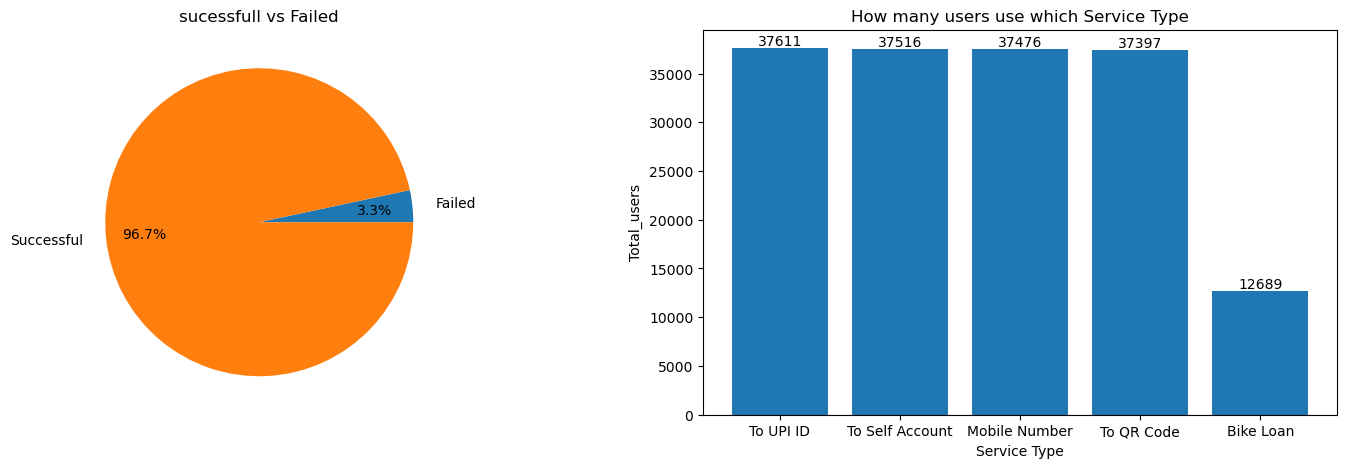

In [127]:
# sucessfull vs faield
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
failed=transaction_sheet.loc[(transaction_sheet["Payment_Status"]=="Failed")|
(transaction_sheet["Payment_Status"]=="Successful")].groupby("Payment_Status").size().reset_index(name="count")
plt.pie(failed["count"],labels=failed["Payment_Status"],autopct="%1.1f%%",labeldistance=1.15,pctdistance=0.75)
plt.title("sucessfull vs Failed")




# how many users use which servies
plt.subplot(1,2,2)
service_counts=transaction_sheet.groupby("Service Type")["User_ID"].count().reset_index()
sort_by_services=service_counts.sort_values(by="User_ID",ascending=False).head(5)
plt.bar(sort_by_services["Service Type"],sort_by_services["User_ID"])
plt.title("How many users use which Service Type")
plt.xlabel("Service Type")
plt.ylabel("Total_users")
for i,values in zip(sort_by_services["Service Type"],sort_by_services["User_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom")
plt.show()


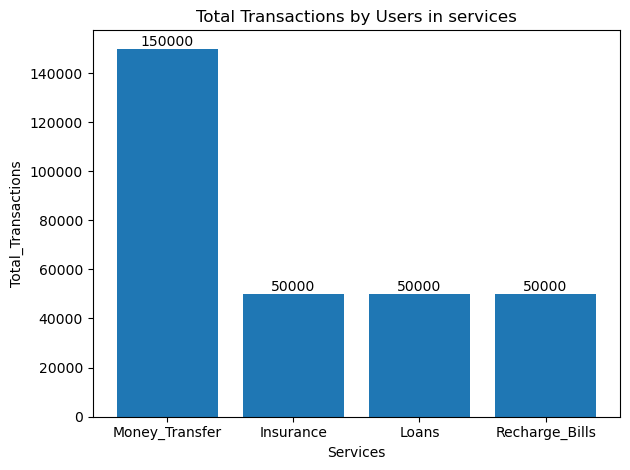

In [125]:
service_counts=transaction_sheet.groupby("Service")["Transaction_ID"].count().reset_index()
sort_by_services=service_counts.sort_values(by="Transaction_ID",ascending=False)
plt.bar(sort_by_services["Service"],sort_by_services["Transaction_ID"])
plt.title("Total Transactions by Users in services")
plt.xlabel("Services")
plt.ylabel("Total_Transactions")
for i,values in zip(sort_by_services["Service"],sort_by_services["Transaction_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom")
plt.tight_layout()
plt.show()

In [130]:
money_transfer_data=df["Money_Transfer"]
money_transfer_data.head(10)

,Transaction_ID,User_ID,Transfer_Type,Amount,Date,Payment_Status,Reason
0,MTX_E258FAF7C042,PP1068692,To Self Account,1678.20,2024-02-09,Successful,Successful
1,MTX_80B43327CBE4,PP0021745,To Mobile Number,2195.34,2024-06-03,Successful,Successful
2,MTX_D61559C04F15,PP0017430,To QR Code,1934.94,2024-01-07,Successful,Successful
3,MTX_693373EE78A6,PP1099074,To UPI ID,1975.31,2024-10-06,Successful,Successful
4,MTX_D3AF01B270AF,PP1054775,To Self Account,1870.31,2024-07-27,Successful,Successful
5,MTX_0F1F22B6DF76,PP0015185,To Mobile Number,533.89,2024-12-23,Successful,Successful
6,MTX_A9AA0DEA2BFB,PP0040208,To UPI ID,2913.73,2024-10-28,Successful,Successful
7,MTX_80D6D3CEB502,PP1096695,To Mobile Number,2894.06,2024-09-04,Successful,Successful
8,MTX_198505B228FA,PP1067686,To Mobile Number,2801.24,2024-02-02,Failed,Insufficient amount
9,MTX_AD8002BECE92,PP1065648,To Mobile Number,4387.23,2024-12-01,Successful,Successful


In [161]:
# EDA


money_transfer_data.info()
money_transfer_data["year"]=money_transfer_data["Date"].dt.year
money_transfer_data["month"]=money_transfer_data["Date"].dt.month
money_transfer_data["quater"]=money_transfer_data["Date"].dt.quarter
money_transfer_data["Weekdays"]=money_transfer_data["Date"].dt.day_name()
money_transfer_data.isnull().sum()
money_transfer_data.duplicated().sum()
money_transfer_data.drop_duplicates(inplace=True)
money_transfer_data.head(10)
money_transfer_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction_ID  150000 non-null  object        
 1   User_ID         150000 non-null  object        
 2   Transfer_Type   150000 non-null  object        
 3   Amount          150000 non-null  float64       
 4   Date            150000 non-null  datetime64[ns]
 5   Payment_Status  150000 non-null  object        
 6   Reason          150000 non-null  object        
 7   year            150000 non-null  int32         
 8   month           150000 non-null  int32         
 9   quater          150000 non-null  int32         
 10  Weekdays        150000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 10.9+ MB


,Amount,Date,year,month,quater
count,150000.000000,150000,150000.0,150000.000000,150000.000000
mean,2521.297548,2024-07-01 04:24:16.703999744,2024.0,6.504680,2.503467
min,50.040000,2024-01-01 00:00:00,2024.0,1.000000,1.000000
25%,1288.727500,2024-04-01 00:00:00,2024.0,4.000000,2.000000
50%,2522.350000,2024-07-01 00:00:00,2024.0,7.000000,3.000000
75%,3760.200000,2024-10-01 00:00:00,2024.0,10.000000,4.000000
max,4999.990000,2024-12-30 00:00:00,2024.0,12.000000,4.000000
std,1429.210487,NaN,0.0,3.448252,1.117913


In [148]:
# outliers()
# IQR
q1=money_transfer_data["Amount"].quantile(0.25)
q3=money_transfer_data["Amount"].quantile(0.75)

Iqr=q3-q1
lower_bound=q1-1.5*Iqr
upper_bound=q3+1.5*Iqr

outliers=money_transfer_data[(money_transfer_data["Amount"]<lower_bound)|(money_transfer_data["Amount"]>upper_bound)]
print(outliers.shape[0])

0


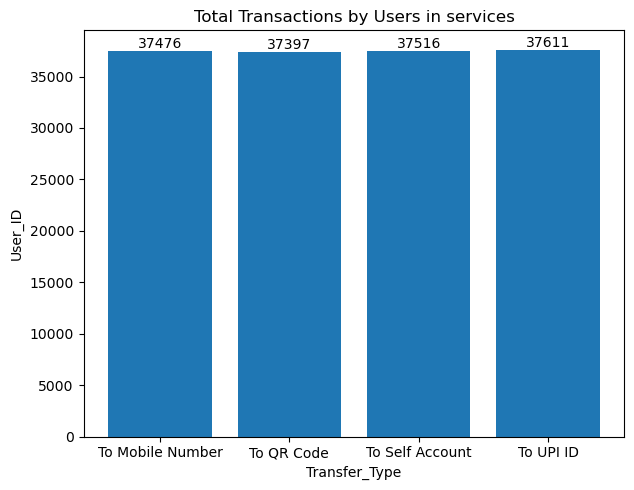

In [150]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
Transfer_type_group=money_transfer_data.groupby("Transfer_Type")["User_ID"].count().reset_index()
sort_by_services=Transfer_type_group.sort_values(by="User_ID",ascending=False)
plt.bar(Transfer_type_group["Transfer_Type"],Transfer_type_group["User_ID"])
plt.title("Total Transactions by Users in services")
plt.xlabel("Transfer_Type")
plt.ylabel("User_ID")
for i,values in zip(Transfer_type_group["Transfer_Type"],Transfer_type_group["User_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom")
plt.tight_layout()
plt.show()

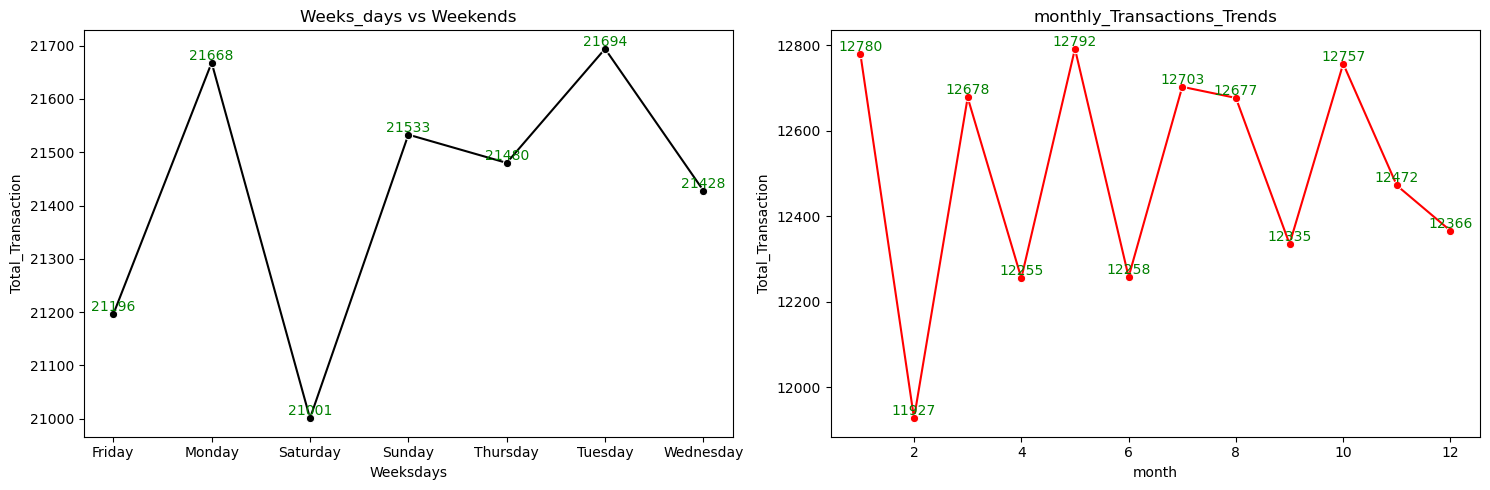

In [171]:
# money_transfer_data.head(10)

# Weeks_days vs Weekends
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
weekends_weekdays=money_transfer_data.groupby("Weekdays")["Transaction_ID"].count().reset_index()
sns.lineplot(data=weekends_weekdays,x="Weekdays",y="Transaction_ID",marker="o",color="black")
plt.title("Weeks_days vs Weekends")
plt.xlabel("Weeksdays")
plt.ylabel("Total_Transaction")
for i,values in zip(weekends_weekdays["Weekdays"],weekends_weekdays["Transaction_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom",color="green")
plt.tight_layout()

# monthly_Transactions_Trends
plt.subplot(1,2,2)
weekends_weekdays=money_transfer_data.groupby("month")["Transaction_ID"].count().reset_index()
sns.lineplot(data=weekends_weekdays,x="month",y="Transaction_ID",marker="o",color="red")
plt.title("monthly_Transactions_Trends")
plt.xlabel("month")
plt.ylabel("Total_Transaction")
for i,values in zip(weekends_weekdays["month"],weekends_weekdays["Transaction_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom",color="green")
plt.tight_layout()
plt.show()
plt.show()

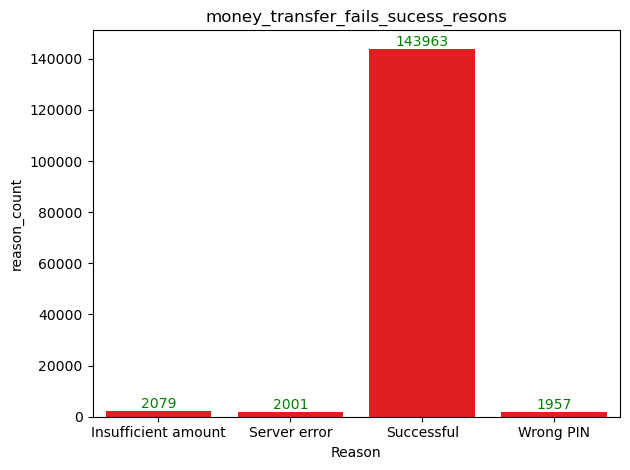

In [177]:
# money_trasnfer_fails

money_trasnfer_fails_sucess_resons=money_transfer_data.groupby("Reason")["Reason"].size().reset_index(name="reason_count")
sns.barplot(data=money_trasnfer_fails_sucess_resons,x="Reason",y="reason_count",color="red")
plt.title("money_transfer_fails_sucess_resons")
plt.xlabel("Reason")
plt.ylabel("reason_count")
for i,values in zip(money_trasnfer_fails_sucess_resons["Reason"],money_trasnfer_fails_sucess_resons["reason_count"]):
    plt.text(i,values,str(values),ha="center",va="bottom",color="green")
plt.tight_layout()
plt.show()
plt.show()

In [203]:
# EDA
Loans_data=df["Loans"]
Loans_data["year"]=Loans_data["Date"].dt.year
Loans_data["month"]=Loans_data["Date"].dt.month
Loans_data.info()
Loans_data.describe()
Loans_data.isnull().sum()
Loans_data.duplicated().sum()
Loans_data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  50000 non-null  object        
 1   User_ID         50000 non-null  object        
 2   Loan_Type       50000 non-null  object        
 3   Loan_Amount     50000 non-null  float64       
 4   Date            50000 non-null  datetime64[ns]
 5   Payment_Status  50000 non-null  object        
 6   Reason          50000 non-null  object        
 7   year            50000 non-null  int32         
 8   month           50000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(5)
memory usage: 3.1+ MB


,Transaction_ID,User_ID,Loan_Type,Loan_Amount,Date,Payment_Status,Reason,year,month
0,LON_1329C39D026B,PP1057315,Gold Loan,71162.95,2024-01-20,Successful,Successful,2024,1
1,LON_AA5EB40B65D8,PP0044616,Mutual Fund,40957.29,2024-10-26,Successful,Successful,2024,10
2,LON_9AED5B360DA3,PP1073567,Mutual Fund,31208.04,2024-04-11,Successful,Successful,2024,4
3,LON_0F4FE9465FF6,PP0042929,Auto Loan,23149.14,2024-10-17,Successful,Successful,2024,10
4,LON_A4676711FB3E,PP0034329,Mutual Fund,47599.00,2024-04-08,Successful,Successful,2024,4
...,...,...,...,...,...,...,...,...,...
49995,LON_3C932033E350,PP0026300,Auto Loan,35620.89,2024-03-28,Successful,Successful,2024,3
49996,LON_A8F0CB407FD9,PP1049128,Gold Loan,62187.35,2024-05-15,Successful,Successful,2024,5
49997,LON_0B5C9C798BB0,PP1054678,Mutual Fund,90890.79,2024-09-27,Successful,Successful,2024,9
49998,LON_0CB9540E414C,PP1067685,Gold Loan,12809.96,2024-11-04,Successful,Successful,2024,11


In [190]:
# outliers

q1=Loans_data["Loan_Amount"].quantile(0.25)
q3=Loans_data["Loan_Amount"].quantile(0.75)

iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

outliers=Loans_data[(Loans_data["Loan_Amount"]<lower_bound)|(Loans_data["Loan_Amount"]>upper_bound)]
print(outliers.shape[0])

0


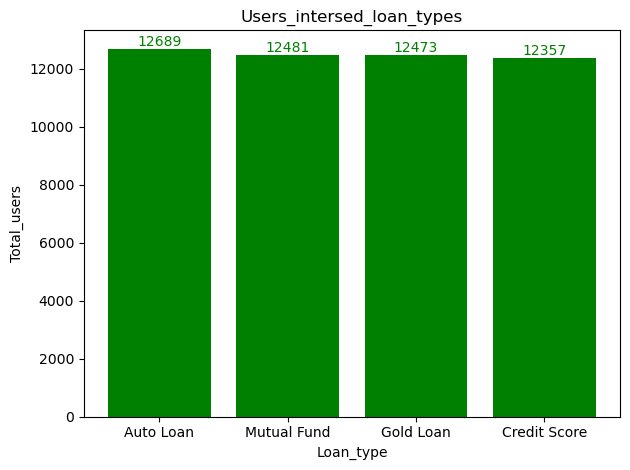

In [197]:
loan_type_group=Loans_data.groupby("Loan_Type")["User_ID"].count().reset_index()
sort_by_users=loan_type_group.sort_values(by="User_ID",ascending=False)
plt.bar(sort_by_users["Loan_Type"],sort_by_users["User_ID"],color="green")
plt.title("Users_intersed_loan_types")
plt.xlabel("Loan_type")
plt.ylabel("Total_users")
for i,values in zip(sort_by_users["Loan_Type"],sort_by_users["User_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom",color="green")
plt.tight_layout()
plt.show()

In [214]:
Loan_amount_details=Loans_data.groupby("Loan_Type").agg({"Loan_Amount":["mean","sum","min","max"]})
Loan_amount_details

Loan_amount_details_by_year=Loans_data.groupby("year").agg({"User_ID":["count","min","max"]})
Loan_amount_details_by_year

Loan_amount_details_by_Users=Loans_data.groupby("User_ID")["Loan_Amount"].sum().reset_index()
Loan_amount_details_by_Users_sort_top_10=Loan_amount_details_by_Users.sort_values(by="Loan_Amount",ascending=False).head(10)
Loan_amount_details_by_Users_sort_top_10

Loan_amount_details_by_Users=Loans_data.groupby("User_ID")["Loan_Amount"].sum().reset_index()
Loan_amount_details_by_Users_sort_bottom_10=Loan_amount_details_by_Users.sort_values(by="Loan_Amount",ascending=True).head(10)
Loan_amount_details_by_Users_sort_bottom_10


,User_ID,Loan_Amount
4417,PP0012266,1002.16
29784,PP1080807,1004.93
16086,PP0044376,1007.08
29229,PP1079314,1009.18
8752,PP0024170,1010.41
11740,PP0032467,1013.54
12877,PP0035557,1019.54
10413,PP0028783,1025.70
13572,PP0037434,1025.78
5704,PP0015920,1028.63


In [216]:
# EDA
insurance_data=df["Insurance"]
insurance_data["year"]=insurance_data["Date"].dt.year
insurance_data["month"]=insurance_data["Date"].dt.month
insurance_data.info()
insurance_data.describe()
insurance_data.isnull().sum()
insurance_data.duplicated().sum()
insurance_data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  50000 non-null  object        
 1   User_ID         50000 non-null  object        
 2   Insurance_Type  50000 non-null  object        
 3   Premium         50000 non-null  float64       
 4   Date            50000 non-null  datetime64[ns]
 5   Payment_Status  50000 non-null  object        
 6   Reason          50000 non-null  object        
 7   year            50000 non-null  int32         
 8   month           50000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(5)
memory usage: 3.1+ MB


,Premium,Date,year,month
count,50000.000000,50000,50000.0,50000.00000
mean,10258.459314,2024-07-01 01:05:31.199999744,2024.0,6.50010
min,500.180000,2024-01-01 00:00:00,2024.0,1.00000
25%,5393.437500,2024-04-01 00:00:00,2024.0,4.00000
50%,10278.525000,2024-07-01 00:00:00,2024.0,7.00000
75%,15141.870000,2024-09-30 00:00:00,2024.0,9.00000
max,19999.510000,2024-12-30 00:00:00,2024.0,12.00000
std,5628.229842,NaN,0.0,3.44161


0


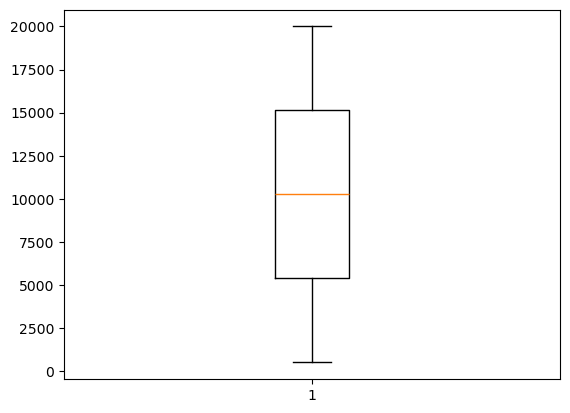

In [218]:
# outliers

q1=insurance_data["Premium"].quantile(0.25)
q3=insurance_data["Premium"].quantile(0.75)

iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

outliers=insurance_data[(insurance_data["Premium"]<lower_bound)|(insurance_data["Premium"]>upper_bound)]
print(outliers.shape[0])

plt.boxplot(insurance_data["Premium"])
plt.show()

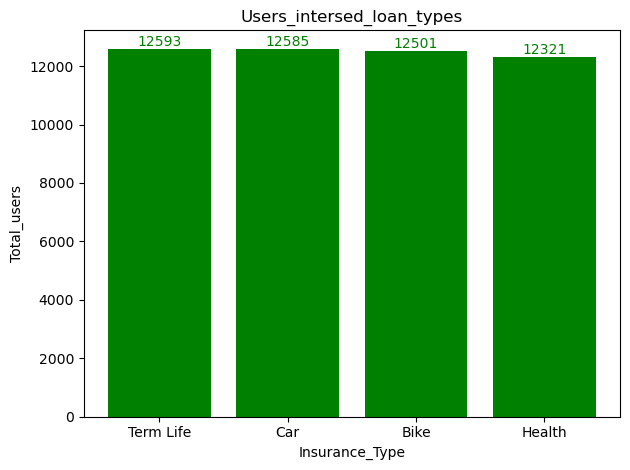

In [220]:
insurance_type_group=insurance_data.groupby("Insurance_Type")["User_ID"].count().reset_index()
sort_by_users=insurance_type_group.sort_values(by="User_ID",ascending=False)
plt.bar(sort_by_users["Insurance_Type"],sort_by_users["User_ID"],color="green")
plt.title("Users_intersed_loan_types")
plt.xlabel("Insurance_Type")
plt.ylabel("Total_users")
for i,values in zip(sort_by_users["Insurance_Type"],sort_by_users["User_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom",color="green")
plt.tight_layout()
plt.show()

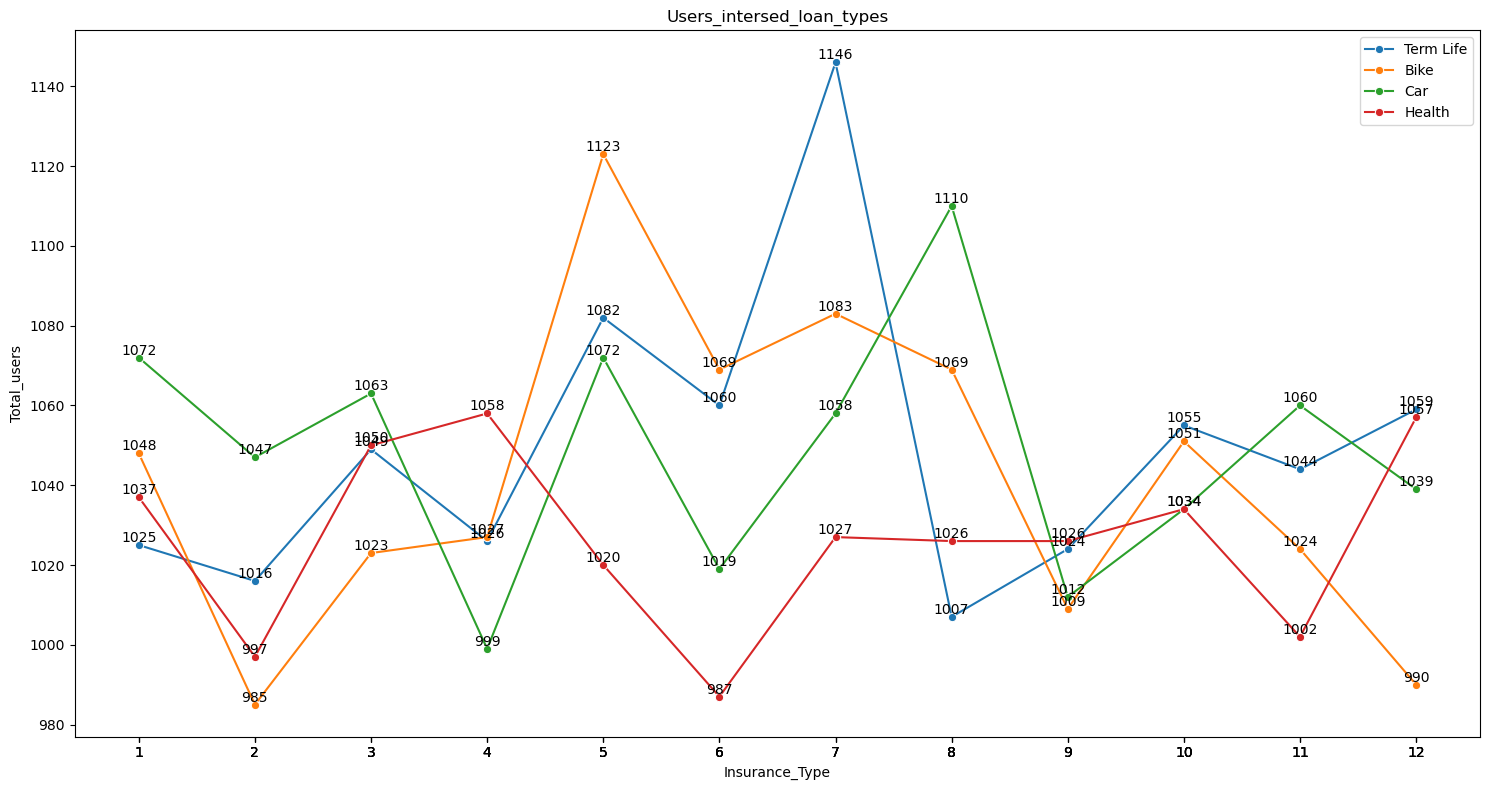

In [230]:
plt.figure(figsize=(15,8))
year_wise_insurance_types=insurance_data.groupby(["month","Insurance_Type"])["Transaction_ID"].count().reset_index()
sort_by_year=year_wise_insurance_types.sort_values(by="Transaction_ID",ascending=False)
sns.lineplot(data=sort_by_year,x="month",y="Transaction_ID",color="skyblue",marker="o",hue="Insurance_Type")
plt.title("Users_intersed_loan_types")
plt.legend()
plt.xlabel("Insurance_Type")
plt.ylabel("Total_users")
for i,values in zip(sort_by_year["month"],sort_by_year["Transaction_ID"]):
    plt.text(i,values,str(values),ha="center",va="bottom",color="black")
plt.tight_layout()
plt.xticks(sort_by_year["month"])
plt.show()